In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def get_name_job(magnitude):
    name_job = '%.2E' % (magnitude/100)
    name_job = name_job.replace('.', '')
    name_job = 'heatflux' + name_job.replace('+', '')
    return name_job
 
num_timestep = []
num_points = []

xy_meta = []
xy_data = []


with open('saved_data_1', 'rb') as f:
    while True:
        try:
            xy_meta.append(pickle.load(f, encoding='bytes'))
            xy_data.append(pickle.load(f, encoding='bytes'))
        except EOFError:
            break

num_points = xy_meta[0][b'num_intervals']
num_timestep = xy_meta[0][b'frame']
num_load = len(xy_data)

for i in range(num_load):
    xy_data[i] = xy_data[i][0]

magnitude = np.empty((num_load))
for i in range(num_load):
    magnitude[i] = xy_meta[i][b'magnitude']
#xy_data structure
#number of different load
#time
#resolution
#x, y pair

In [58]:
xy_meta

[{b'num_intervals': 150,
  b'step': 1,
  b'magnitude': 10000000.0,
  b'name': b'heatflux100E05',
  b'frame': 50},
 {b'num_intervals': 150,
  b'step': 1,
  b'magnitude': 4176250000.0,
  b'name': b'heatflux418E07',
  b'frame': 50},
 {b'num_intervals': 150,
  b'step': 1,
  b'magnitude': 8342500000.0,
  b'name': b'heatflux834E07',
  b'frame': 50},
 {b'num_intervals': 150,
  b'step': 1,
  b'magnitude': 12508750000.0,
  b'name': b'heatflux125E08',
  b'frame': 50},
 {b'num_intervals': 150,
  b'step': 1,
  b'magnitude': 16675000000.0,
  b'name': b'heatflux167E08',
  b'frame': 50},
 {b'num_intervals': 150,
  b'step': 1,
  b'magnitude': 20841250000.0,
  b'name': b'heatflux208E08',
  b'frame': 50},
 {b'num_intervals': 150,
  b'step': 1,
  b'magnitude': 25007500000.0,
  b'name': b'heatflux250E08',
  b'frame': 50},
 {b'num_intervals': 150,
  b'step': 1,
  b'magnitude': 29173750000.0,
  b'name': b'heatflux292E08',
  b'frame': 50},
 {b'num_intervals': 150,
  b'step': 1,
  b'magnitude': 33340000000.0,

In [70]:
y = np.empty((num_load, num_timestep, num_points))
y = np.array(xy_data)[:,:,:,1]

last_timestep = y[:,-1,:].squeeze()
highest_e = y[-3:-1, :, :].squeeze()
max_last_ts = np.max(last_timestep, axis=1)

loc_max_last_ts = np.argmax(last_timestep, axis=1)
peak_loc_thro_t = np.argmax(y[-3:-1, :, :], axis=2)
peak_stress_value = np.max(highest_e, axis=2)

yield_stres = 1.5e10
yield_time = np.zeros((num_load))

for i in range(num_load):
    for j in range(num_timestep):
        if np.max(y[i, j]) > yield_stres:
            yield_time[i] = j
            break


Text(0.5, 1.0, 'Energy required to achieve yielding stress')

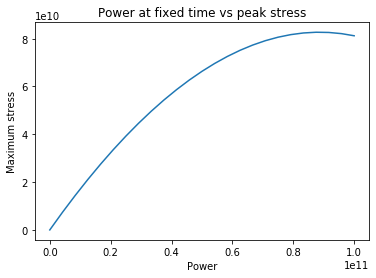

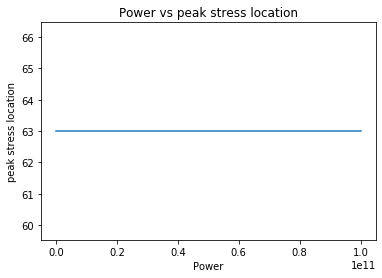

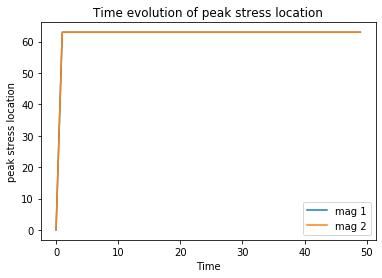

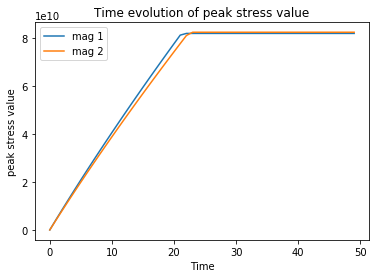

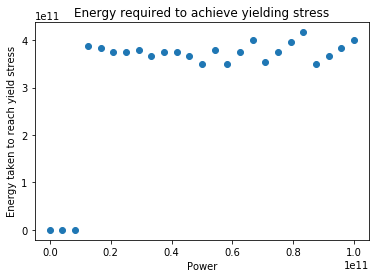

In [71]:
plt.figure()
plt.plot(magnitude, max_last_ts)
plt.xlabel('Power')
plt.ylabel('Maximum stress')
plt.title('Power at fixed time vs peak stress')

plt.figure()
plt.plot(magnitude, loc_max_last_ts)
plt.xlabel('Power')
plt.ylabel('peak stress location')
plt.title('Power vs peak stress location')

plt.figure()
plt.plot(peak_loc_thro_t[-1,:])
plt.plot(peak_loc_thro_t[-2,:])
plt.legend(('mag 1', 'mag 2'))
plt.xlabel('Time')
plt.ylabel('peak stress location')
plt.title('Time evolution of peak stress location')

plt.figure()
plt.plot(peak_stress_value[-1,:])
plt.plot(peak_stress_value[-2,:])
plt.legend(('mag 1', 'mag 2'))
plt.xlabel('Time')
plt.ylabel('peak stress value')
plt.title('Time evolution of peak stress value') 

plt.figure()
plt.scatter(magnitude, yield_time*magnitude)
plt.xlabel('Power')
plt.ylabel('Energy taken to reach yield stress')
plt.title('Energy required to achieve yielding stress') 

In [72]:
yield_time

array([ 0.,  0.,  0., 31., 23., 18., 15., 13., 11., 10.,  9.,  8.,  7.,
        7.,  6.,  6.,  6.,  5.,  5.,  5.,  5.,  4.,  4.,  4.,  4.])